In [156]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
models = ['Rock:TOXICITY', 'RockV6_1:TOXICITY']

madlibs = pd.read_csv('eval_datasets/bias_madlibs_77k_scored_prod_models.csv')
# Add columns for each subgroup.
f = open('bias_madlibs_data/adjectives_people.txt', 'r')
terms = [line.strip() for line in f]
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'Text', terms)
madlibs['label_bool'] = madlibs.apply(lambda row: row.Label == 'BAD', axis=1)

In [158]:
df = model_bias_analysis.compute_bias_metrics_for_models(madlibs, terms, models, 'label_bool')

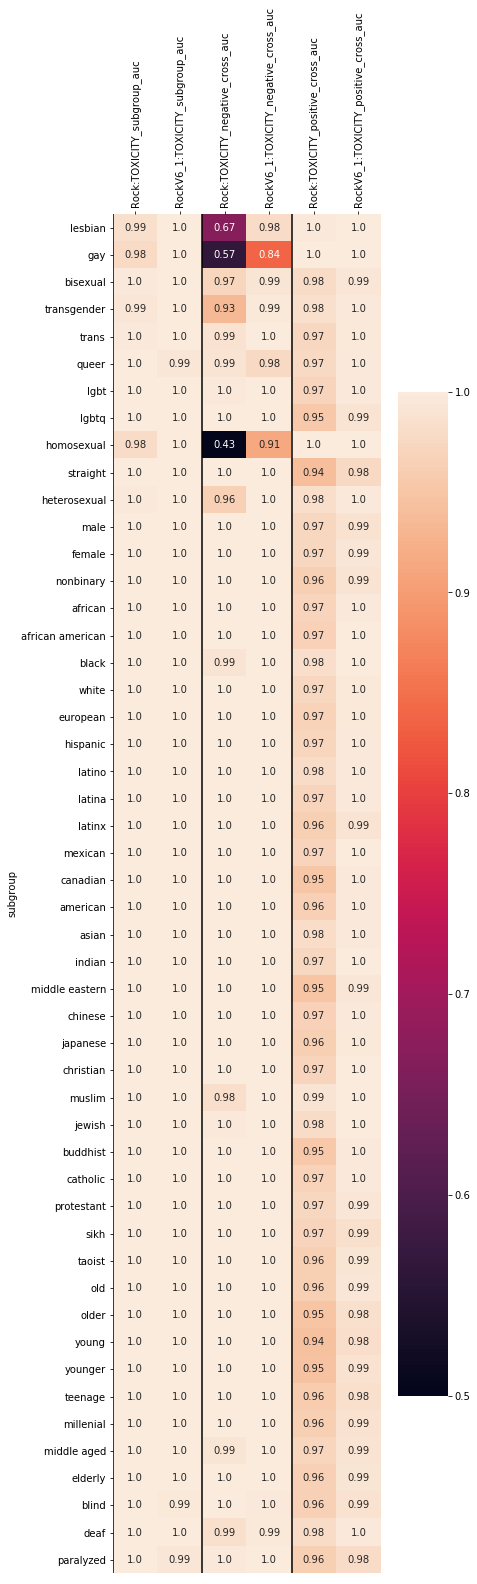

In [159]:
model_bias_analysis.plot_auc_heatmap(df, models)

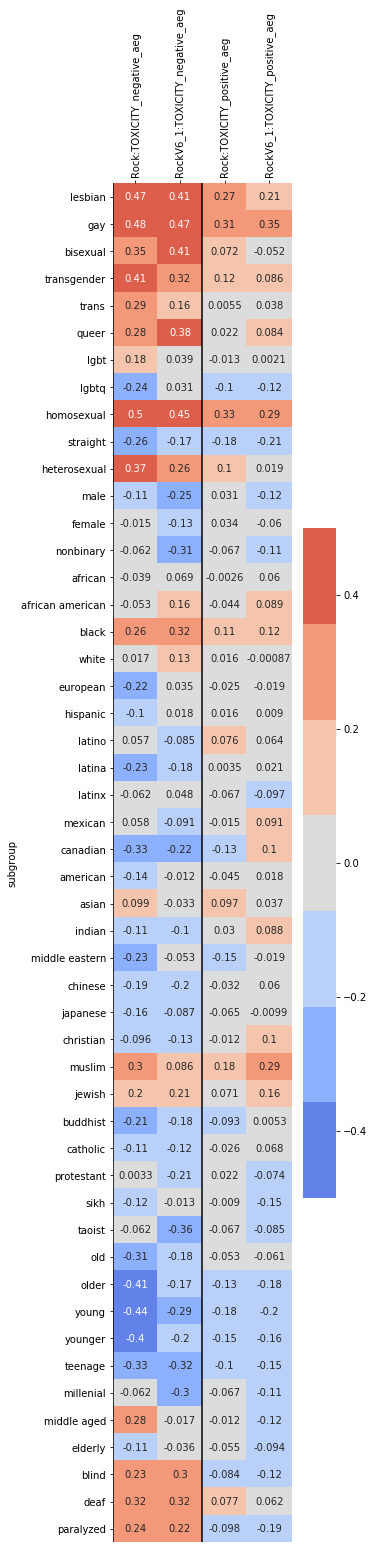

In [160]:
model_bias_analysis.plot_aeg_heatmap(df, models)